In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandasql as ps
%matplotlib inline 

In [2]:
nfl = pd.read_csv('players.csv')
nfl

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [11]:
nfl['height_inches'] = nfl['height'].apply(lambda x: int(x.split("-")[0])*12 + int(x.split("-")[1]) if len(x.split("-"))== 2 else int(x))  # this is bad. no readability. just def a function in the future is better
nfl

,nflId,height,weight,birthDate,collegeName,Position,displayName,heigh_inches,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73,73
...,...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73,73


Text(0.5, 1.0, 'Central Limit Theorem')

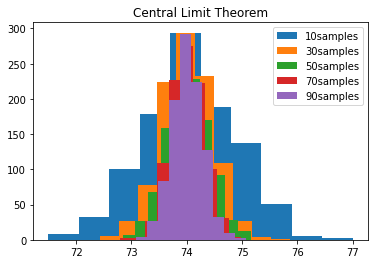

In [12]:
sample_amounts = range(10,100,20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(nfl['height_inches'].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + "samples" for z in sample_amounts])
plt.title('Central Limit Theorem')

In [21]:
# Standard Error. Sums up the variability in the sampling distribution for a statistic. Able to estimate the standard error based on the standard deviation and the number of values in the sample.
nfl['height_inches'].sem()

0.05065243293253027

In [36]:
# Bootstrap: Method to draw resamples from a sample, replace the values in the resample back to the sample, then draw them again.

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(nfl["height_inches"])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original:{nfl["height_inches"].mean()}')
print(f'bias:{results.mean() - nfl["height_inches"].mean()}')
print(f'std.error:{results.std()}')

Bootstrap Statistics:
original:74.0106149341142
bias:0.0014363103953201062
std.error:0.05104860936054206


In [34]:
resample(nfl["height_inches"]).median()

74.0

<AxesSubplot:>

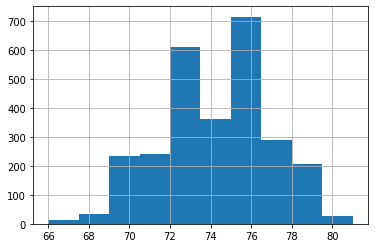

In [29]:
nfl['height_inches'].hist()

In [37]:
# Confidence Interval
import scipy.stats as st

In [39]:
#define sample data
data = nfl['height_inches'].sample(20)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(71.61368970746977, 74.48631029253022)

In [40]:
#define sample data
np.random.seed(0)
data = nfl['height_inches'].sample(1500)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(73.92579453716581, 74.1902054628342)

''

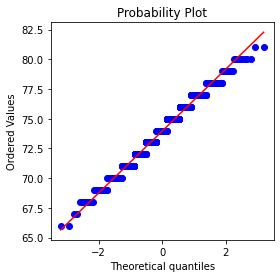

In [43]:
#Normal/Gaussian Distribution

from scipy import stats

fig,ax=plt.subplots(figsize=(4,4))
norm_sample=nfl['height_inches'].sample(1000)
stats.probplot(norm_sample, plot=ax)
;